In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

## Import Data

In [10]:
#load the train dataset
df = pd.read_csv('train.csv')
df.head()
#the id seems to have the same purpose as the index so we can drop id

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
#check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Cleaning the Data

### Dropping columns

In [12]:
df.drop(['Id', 'PoolQC', 'Fence','MiscFeature','FireplaceQu', 'Alley'], axis=1, inplace=True)

### Find Null Value

In [13]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64

In [14]:
#drop all na 
df.dropna(inplace=True)
df.shape

(1094, 75)

## EDA

In [16]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.389466,-0.197903,0.031639,-0.085553,0.021605,0.010178,0.040009,-0.069439,-0.073834,-0.147155,-0.264277,-0.258207,0.319176,0.024935,0.078213,-0.013040,0.012509,0.119495,0.206259,-0.044628,0.258401,0.038180,-0.029575,0.051225,-0.031638,-0.095374,-0.018514,0.006799,-0.019313,-0.035855,-0.021854,0.003221,-0.043299,-0.025393,-0.012347,-0.089478
LotFrontage,-0.389466,1.000000,0.419714,0.241169,-0.047132,0.107958,0.082938,0.189769,0.239734,0.046928,0.111368,0.407566,0.453035,0.074953,0.010748,0.397260,0.115151,-0.000491,0.189692,0.043414,0.277136,0.007411,0.354714,0.260293,0.067254,0.285748,0.357030,0.081338,0.160862,0.016058,0.073004,0.034937,0.211959,0.000789,0.014951,0.013366,0.343978
LotArea,-0.197903,0.419714,1.000000,0.169876,-0.033113,0.028954,0.024308,0.106600,0.232341,0.138615,0.008924,0.324476,0.331295,0.075311,0.019956,0.308590,0.179874,-0.014597,0.132860,0.043977,0.141428,-0.010855,0.241849,0.255842,0.012871,0.173525,0.213104,0.133995,0.098051,-0.022789,0.013343,0.072413,0.109294,0.012483,0.006270,-0.006412,0.302268
OverallQual,0.031639,0.241169,0.169876,1.000000,-0.189587,0.590761,0.568582,0.419756,0.230438,-0.081342,0.297384,0.547448,0.527908,0.265906,-0.011186,0.610102,0.107138,-0.060775,0.597881,0.239893,0.091462,-0.141071,0.465733,0.409725,0.562405,0.605466,0.555315,0.273652,0.335884,-0.155080,0.020081,0.049286,0.080037,-0.062944,0.082995,-0.003529,0.795437
OverallCond,-0.085553,-0.047132,-0.033113,-0.189587,1.000000,-0.437647,0.024427,-0.174581,-0.068285,0.040598,-0.169743,-0.243419,-0.166191,0.004047,0.047865,-0.115250,-0.072778,0.121421,-0.225995,-0.089625,0.012300,-0.070660,-0.093309,-0.030731,-0.353291,-0.269616,-0.233585,-0.018856,-0.084405,0.067124,-0.010881,0.084416,-0.024919,0.121407,-0.009661,0.046775,-0.138511
YearBuilt,0.021605,0.107958,0.028954,0.590761,-0.437647,1.000000,0.625905,0.328897,0.234207,-0.058987,0.170077,0.423763,0.311928,-0.021327,-0.165742,0.198778,0.179631,-0.051070,0.501806,0.215519,-0.072816,-0.188032,0.117850,0.128739,0.824156,0.533258,0.470809,0.236512,0.235486,-0.399540,0.030743,-0.065413,0.006402,-0.098054,0.014127,-0.003639,0.523434
YearRemodAdd,0.010178,0.082938,0.024308,0.568582,0.024427,0.625905,1.000000,0.187492,0.111675,-0.063813,0.187505,0.302488,0.286565,0.096666,-0.055626,0.287412,0.104034,-0.020028,0.481361,0.156398,-0.083789,-0.164620,0.182860,0.113930,0.648282,0.473753,0.413917,0.240775,0.259469,-0.220843,0.020567,-0.038039,0.018813,-0.040388,0.031242,0.037684,0.519806
MasVnrArea,0.040009,0.189769,0.106600,0.419756,-0.174581,0.328897,0.187492,1.000000,0.281356,-0.080799,0.100304,0.393759,0.366980,0.175714,-0.064121,0.411984,0.104328,-0.008813,0.285860,0.193173,0.113076,-0.005568,0.319725,0.244142,0.273768,0.376417,0.379851,0.172564,0.127648,-0.124837,0.022347,0.050990,0.021251,-0.054042,0.012993,-0.015395,0.485409
BsmtFinSF1,-0.069439,0.239734,0.232341,0.230438,-0.068285,0.234207,0.111675,0.281356,1.000000,-0.046328,-0.550064,0.519707,0.474238,-0.128898,-0.053742,0.237528,0.644989,0.057684,0.057163,-0.005148,-0.105209,-0.024883,0.085445,0.265067,0.155277,0.195145,0.283658,0.198025,0.119597,-0.109888,0.025332,0.054479,0.195060,0.002687,-0.017023,0.015389,0.378678
BsmtFinSF2,-0.073834,0.046928,0.138615,-0.081342,0.040598,-0.058987,-0.063813,-0.080799,-0.046328,1.000000,-0.239976,0.073031,0.070618,-0.113444,0.015065,-0.041473,0.162429,0.058442,-0.084841,-0.034299,0.009635,-0.039562,-0.055731,0.017973,-0.080843,-0.081215,-0.055096,0.030734,0.008995,0.047798,-0.030389,0.067083,0.061174,0.014589,-0.039888,0.036587,-0.036923


### Data visualization on some highly correlated variables

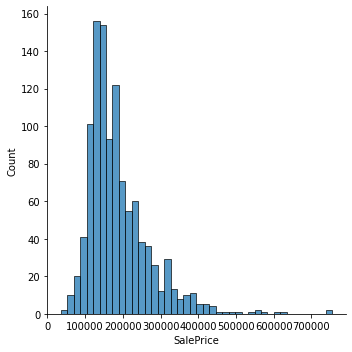

In [19]:
sns.displot(x=df["SalePrice"]);

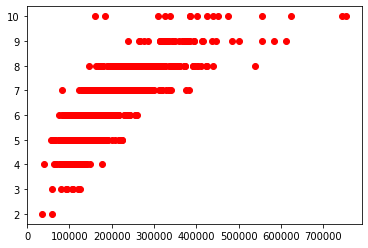

In [22]:
plt.scatter(df["SalePrice"],df["OverallQual"], c= 'r')
plt.show()
#seems as the price increases the overall quality to also seem to increase

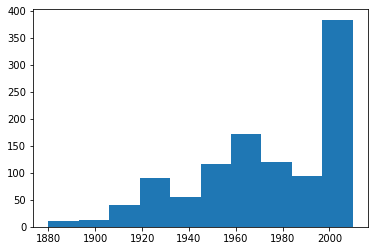

In [23]:
plt.hist(df['YearBuilt'])
plt.show()
#highest number of houses are built in the 2000S

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

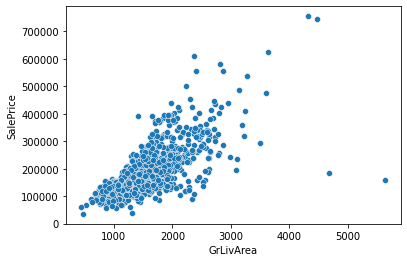

In [25]:
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice")